<p style="background-color:#FF9999;color:black;font-size:35px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.5cm">&#127863; SectionB_Wine Quality Prediction
<span style='font-size:35px;'>&#127863;</p></span>


### Wine Quality Dataset

```
   |--- G0234_Group3_Jupyter.ipynb
   |--- G0234_Group3_CSVdataset.csv 

```
* The wine dataset is download from [Kaggle Playground Series - Season 3, Episode 5](https://www.kaggle.com/competitions/playground-series-s3e5/data?select=sample_submission.csv)
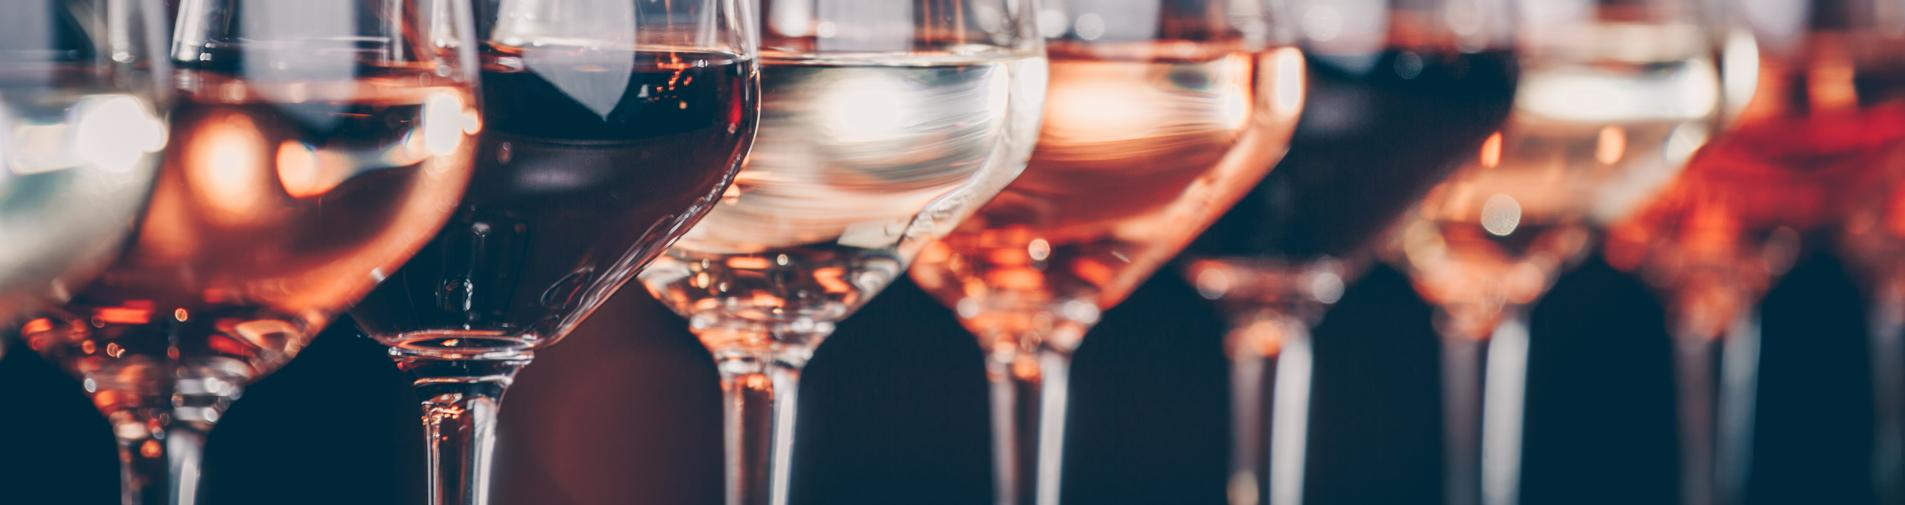

#### Jupyter Notebook prepared By:  [Group3]

<div class="alert alert-block alert-warning" style="margin-top: 20px">

<a id = "Table_of_content"></a>
# Table of content
### 1. [Introduction](#T1)
#### &emsp; |--> [Objective / Purpose](#T11)
### 2. [Dataset Description](#T2)
### 3. [Descriptive Information / Basic Relationships between different variables](#T4)
#### &emsp; |--> [Box Plot](#T41)
#### &emsp; |--> [Histogram Plot + Kernel Density Estimate](#T42)
#### &emsp; |--> [Correlation Heatmap](#T43)
#### &emsp; |--> [Pair Plot](#T44)
### 4. [Analysis](#T5)
#### &emsp; |--> [T-test (One Sample & Two Sample, Welch's Test)](#T51)
#### &emsp; |--> [ANOVA Test (PostHoc Analysis)](#T52)
#### &emsp; |--> [Build Linear Regression Model](#T53)
#### &emsp; |--> [Important feature that contribute to the quality of wine](#T54)
#### &emsp; |--> [Summary of Linear Regression with multiple predictor](#T55)
### 5. [Conclusion / Findings](#T6)

---
<a id = "T1"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
<p style="background-color:#FF9999;color:black;font-size:30px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.0cm">👨‍🏫1) Introduction 👩‍🏫</p>

Nowadays, wine is being enjoyed by an increasing number of consumers. In order to safeguard human health, wine certification and quality assessment are the key elements. Certification prevents illegal wine adulteration and ensures quality in the wine market. Quality assessment is usually part of the certification process and can be used to improve the winemaking and to stratify wines, such as premium brands.<br>

<span style="color:#99004C;">Wine certification</span> is usually assessed through physicochemical and organoleptic tests. The physicochemical laboratory tests typically used to characterize wines include the determination of density, alcohol concentration or pH, while sensory testing relies heavily on human experts. Since taste is the most difficult of the human senses to understand and difficult to sample data for experiments, in this study we first used data from physicochemical laboratory tests and predicted wine quality from them. <br>

<span style="color:#99004C;">Wine quality</span> prediction is the process of using data analysis and machine learning techniques to predict wine quality based on various factors, such as...

<table style="border-collapse: collapse;font-size: 13.5px; width:600px;text-align:center">
  <tr>
    <td>Fixed Acidity</td>
    <td>Volatile Acidity</td>
    <td>Citric Acid</td>
    <td>Residual Sugar</td>
  </tr>
  <tr>
    <td>Chlorides</td>
    <td>Free Sulfur Dioxide</td>
    <td>Total Sulfur Dioxide</td>
    <td>Density</td>
  </tr>
  <tr>
    <td>pH</td>
    <td>Sulphates</td>
    <td>Alcohol</td>
  </tr>
</table>

This process is important to both wine producers and consumers because it helps ensure consistency and reliability in the quality of wines produced and consumed. <br>
<br>
Reference: [Using Data Mining for Wine Quality Assessment]( https://www.researchgate.net/publication/221612614_Using_Data_Mining_for_Wine_Quality_Assessment)

<a id = "T11"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">1.1) Objective / Purpose<span style="color:#99004C;">

&emsp; 1. To *visualize* the statistical information of the wine dataset.<br>
&emsp; 2. To *analyze* the certainty of the data occurance probability.<br>
&emsp; 3. To *represent* the distribution of data in numerical and continuous.<br>
&emsp; 4. To *visualize* the relationship of one factor with other factors.<br>
&emsp; 5. To *determine* the most and the least important features that contribute to the quality of wine.<br>

---
<a id = "T2"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
<p style="background-color:#FF9999;color:black;font-size:30px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.0cm">📑 2) Dataset Description 📑</p>

<Font size="3">In this dataset, we are going to analyze <span style="color:#FF7F7F;">__12 attributes__</span> and <span style="color:#FF7F7F;">__2,056 sets of data__</span>. These features are...

|Attributes|Description|
|:-:|:--|
|**Fixed_Acidity**| The amount of acid in the wine that is not volatile and does not evaporate.|
|**Volatile_Acidity**| The amount of acid in the wine that is volatile and can evaporate.|
|**Citric_Acid**| Natural organic weak acid extracted in wine.<br>|
|**Residual_Sugar**| The amount of sugar remaining in the wine after fermentation.<br>|
|**Chlorides**| The amount of salt in the wine.<br>|
|**Free_Sulfur_Dioxide**| The amount of sulfur dioxide present in the wine that is not bound to other molecules, which is a protection from them.<br>|
|**Total_Sulfur_Dioxide**| The total amount of sulfur dioxide present in the wine.<br>|
|**Density**| The density of the wine.<br>|
|**pH**| The level of acidity or alkaline in the wine.<br>|
|**Sulphates**| The amount of sulphates in the wine, which is a protection from oxidation and bacteria.<br>|
|**Alcohol**| The percentage of alcohol in the wine.<br>|
|**Quality**| The sensory quality of the wine, which is typically rated on a scale from 3 to 8. <br>|

In [1]:
# Import all require library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap
from scipy import stats 
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [2]:
# Load the csv file
df = pd.read_csv("G0234_Group3_CSVdataset.csv")
df

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.20,0.073,30.0,39,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.30,0.092,30.0,67,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.10,0.059,3.0,12,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.60,0.084,11.0,65,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.30,0.079,10.0,45,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2051,6.6,0.31,0.13,2.00,0.056,29.0,42,0.99388,3.52,0.87,12.0,7
2052,2052,9.7,0.59,0.21,1.80,0.079,27.0,65,0.99745,3.14,0.58,9.4,5
2053,2053,7.7,0.43,0.42,1.70,0.071,19.0,37,0.99258,3.32,0.77,12.5,8
2054,2054,9.1,0.50,0.00,1.75,0.058,5.0,13,0.99670,3.22,0.42,9.5,5


In [3]:
# Remove the id columns for all rows
df = df.iloc[:, df.columns!='Id']
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.20,0.073,30.0,39,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.30,0.092,30.0,67,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.10,0.059,3.0,12,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.60,0.084,11.0,65,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.30,0.079,10.0,45,0.99444,3.20,1.36,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,6.6,0.31,0.13,2.00,0.056,29.0,42,0.99388,3.52,0.87,12.0,7
2052,9.7,0.59,0.21,1.80,0.079,27.0,65,0.99745,3.14,0.58,9.4,5
2053,7.7,0.43,0.42,1.70,0.071,19.0,37,0.99258,3.32,0.77,12.5,8
2054,9.1,0.50,0.00,1.75,0.058,5.0,13,0.99670,3.22,0.42,9.5,5


---
<a id = "T4"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
<p style="background-color:#FF9999;color:black;font-size:30px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.0cm">📈 3)  Descriptive Information / Basic Relationships between different variables 📉</p>

In [4]:
df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2056 non-null   float64
 1   volatile_acidity      2056 non-null   float64
 2   citric_acid           2056 non-null   float64
 3   residual_sugar        2056 non-null   float64
 4   chlorides             2056 non-null   float64
 5   free_sulfur_dioxide   2056 non-null   float64
 6   total_sulfur_dioxide  2056 non-null   int64  
 7   density               2056 non-null   float64
 8   pH                    2056 non-null   float64
 9   sulphates             2056 non-null   float64
 10  alcohol               2056 non-null   float64
 11  quality               2056 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 192.9 KB


#### 👆 Above table indicates there is no NULL value and all of the dataset are numerical 

In [5]:
# Descirbe the summary of statistical information, then transpose the rows and columns.
'''
This describe method gives the number of data, mean, median, standard deviation,
minimum value, maximum value, and 1st and 3rd Interquatile Range
'''  
df.describe().T        

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,2056.0,8.365175,1.705390,5.00000,7.2000,7.9500,9.2000,15.90000
volatile_acidity,2056.0,0.527601,0.173164,0.18000,0.3900,0.5200,0.6400,1.58000
citric_acid,2056.0,0.265058,0.188267,0.00000,0.0900,0.2500,0.4200,0.76000
residual_sugar,2056.0,2.398881,0.858824,1.20000,1.9000,2.2000,2.6000,14.00000
chlorides,2056.0,0.081856,0.023729,0.01200,0.0710,0.0790,0.0900,0.41400
free_sulfur_dioxide,2056.0,16.955982,10.009710,1.00000,8.0000,16.0000,24.0000,68.00000
total_sulfur_dioxide,2056.0,49.236868,32.961141,7.00000,22.0000,44.0000,65.0000,289.00000
density,2056.0,0.996748,0.001827,0.99007,0.9956,0.9967,0.9978,1.00369
pH,2056.0,3.310569,0.142321,2.74000,3.2000,3.3100,3.3900,3.78000
sulphates,2056.0,0.641308,0.137942,0.39000,0.5500,0.6100,0.7200,1.95000


In [6]:
print("The dataset contain NULL value?      ", df.isnull().any().any())
print("The dimension of the wine's dataset :", df.shape)
print("The variable 'quality' has", len(df['quality'].unique()), "unique values, which is", df['quality'].unique()) 

The dataset contain NULL value?       False
The dimension of the wine's dataset : (2056, 12)
The variable 'quality' has 6 unique values, which is [6 7 5 4 8 3]


<a id = "T41"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">3.1) Box Plot</span>
___What is [BoxPlot](https://chartio.com/resources/tutorials/what-is-a-box-plot/)?___

BoxPlot is an illustration of graph that visualizes the 6 statistical information, which are ***minimum***, ***maximum***, ***1st quantile***, ***2nd quantile(median)***, ***3rd quantile*** and the ***outliers***.

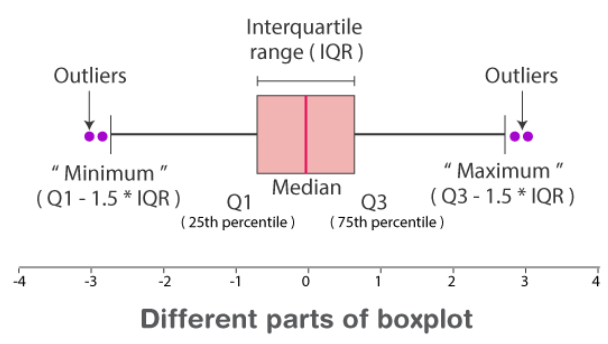

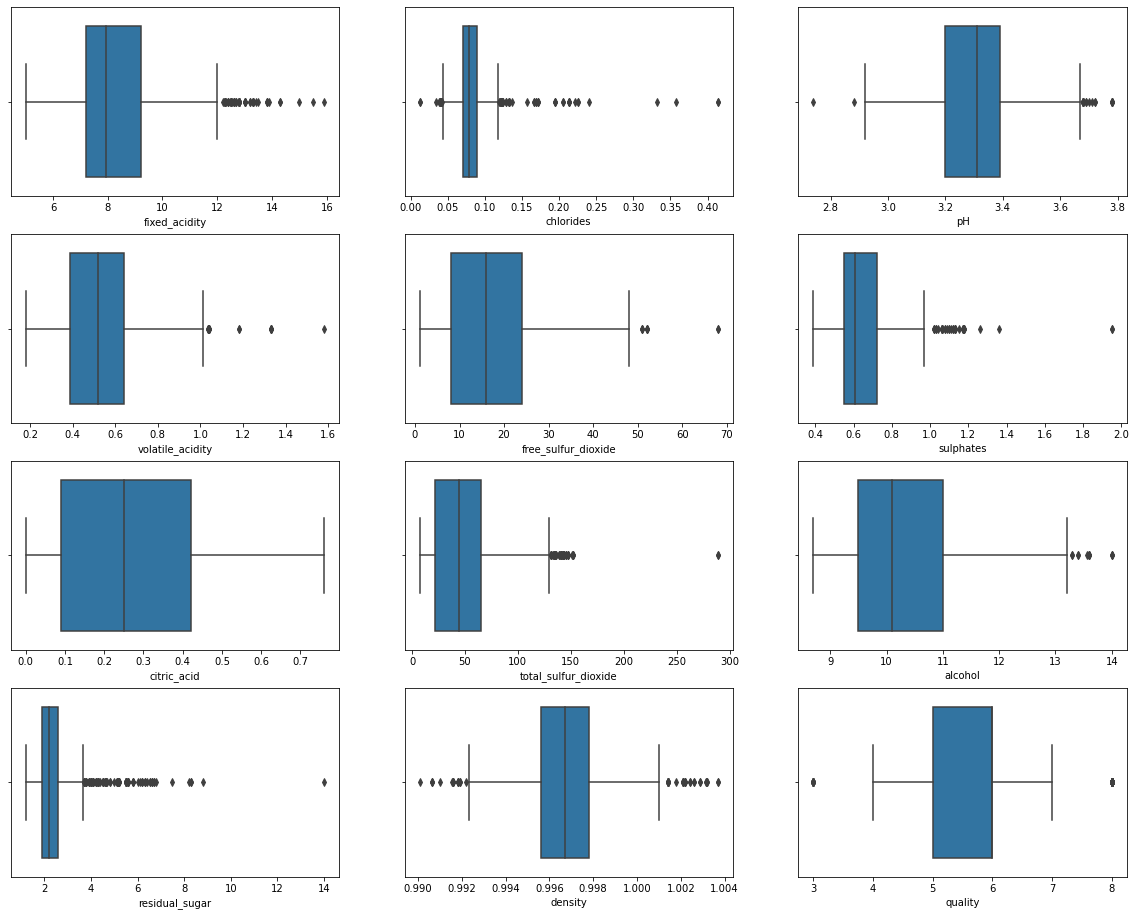

In [7]:
_, ax = plt.subplots(4, 3, figsize=(20, 16))

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax = ax[i%4, i//4])     # 00 10 20 30 01 11 21 31....

<a id = "T42"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">3.2) Histogram Plot + Kernel Density Estimate</span>
___What is [Histogram Plot](https://plotly.com/python/histograms/)?___

Histogram Plot is a representation of the distribution of numerical data and a ***aggregated bar chart***.

___What is [Kernel Density Estimate (KDE)](https://mathisonian.github.io/kde/)?___

KDE visualizes a ***smooth shape of continuous data*** for a discrete histogram graphs, as a type of continuous replacement for the discrete histogram.

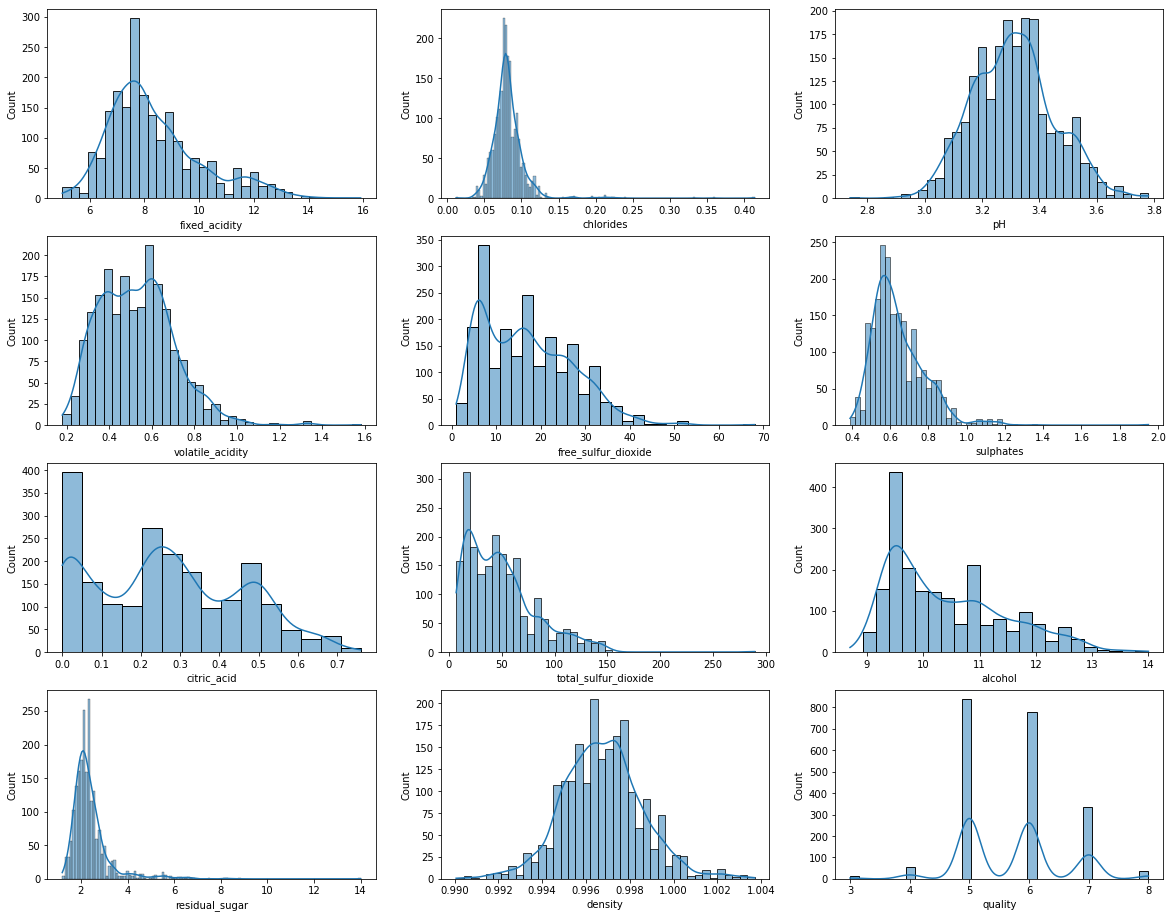

In [8]:
_, ax = plt.subplots(4, 3, figsize = (20, 16))

for i, col in enumerate(df.columns):
    # Enable the kernel density estimate (kde will show the data distribution)
    sns.histplot(data=df, x=col, ax = ax[i%4, i//4], kde=True) 

<a id = "T43"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">3.3) Correlation Heatmap</span>
___What is [Correlation Heatmap](https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/)?___

Correlation Heatmap visualizes the ***linear relationship*** between two variables. 
- The higher the correlation value, the stronger the positive correlation.
- The lower the correlation value, the weaker the negative corelation.
- If correlation value = **1**, it is said to have <span style="color:#FF6666;">**perfect positive correlation**</span>.
- If correlation value = **0**, there is <span style="color:#FF6666;">**no linear relationship**</span> between two continuous variables.
- If correlation value = **-1**, it is said to have <span style="color:#FF6666;">**perfect negative correlation**</span>.

<AxesSubplot:>

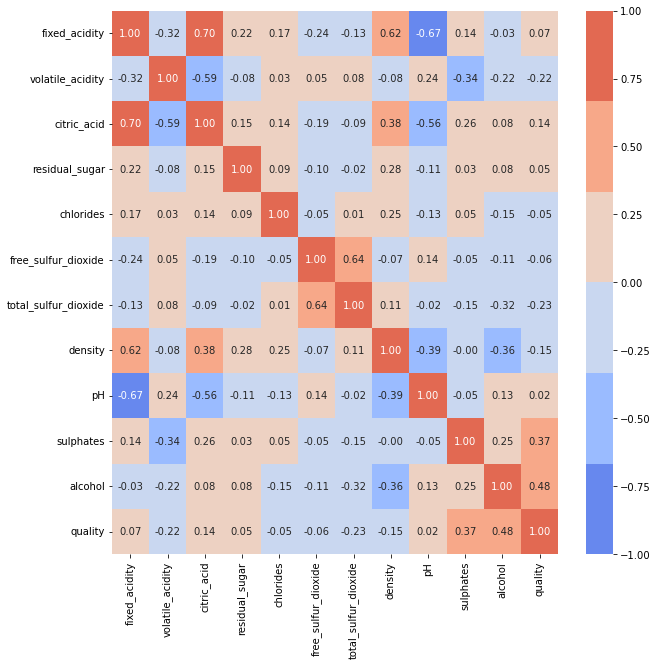

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = sns.color_palette("coolwarm"), ax=ax)

<a id = "T444"></a></a><div style="text-align: right"></a> </div>
#### 👆Interpretation of correlation heatmap:<br>

|Positive Relationship (correlation > 0.5)|Negative Relationship (correlation < -0.5)|
|:-:|:-:|
|Citric Acid & Fixed Acidity | pH & Citric Acid <br>| 
Density & Fixed Acidity | pH & Fixed Acidity <br>|
Total Sulfur Dioxide & Free Sulfur Dioxide |Citric Acid & Volatile Acidity |

* In the section below, pairplot is used to better visualize the actual distribution of data.

<a id = "T44"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">3.4) Pairplot</span>

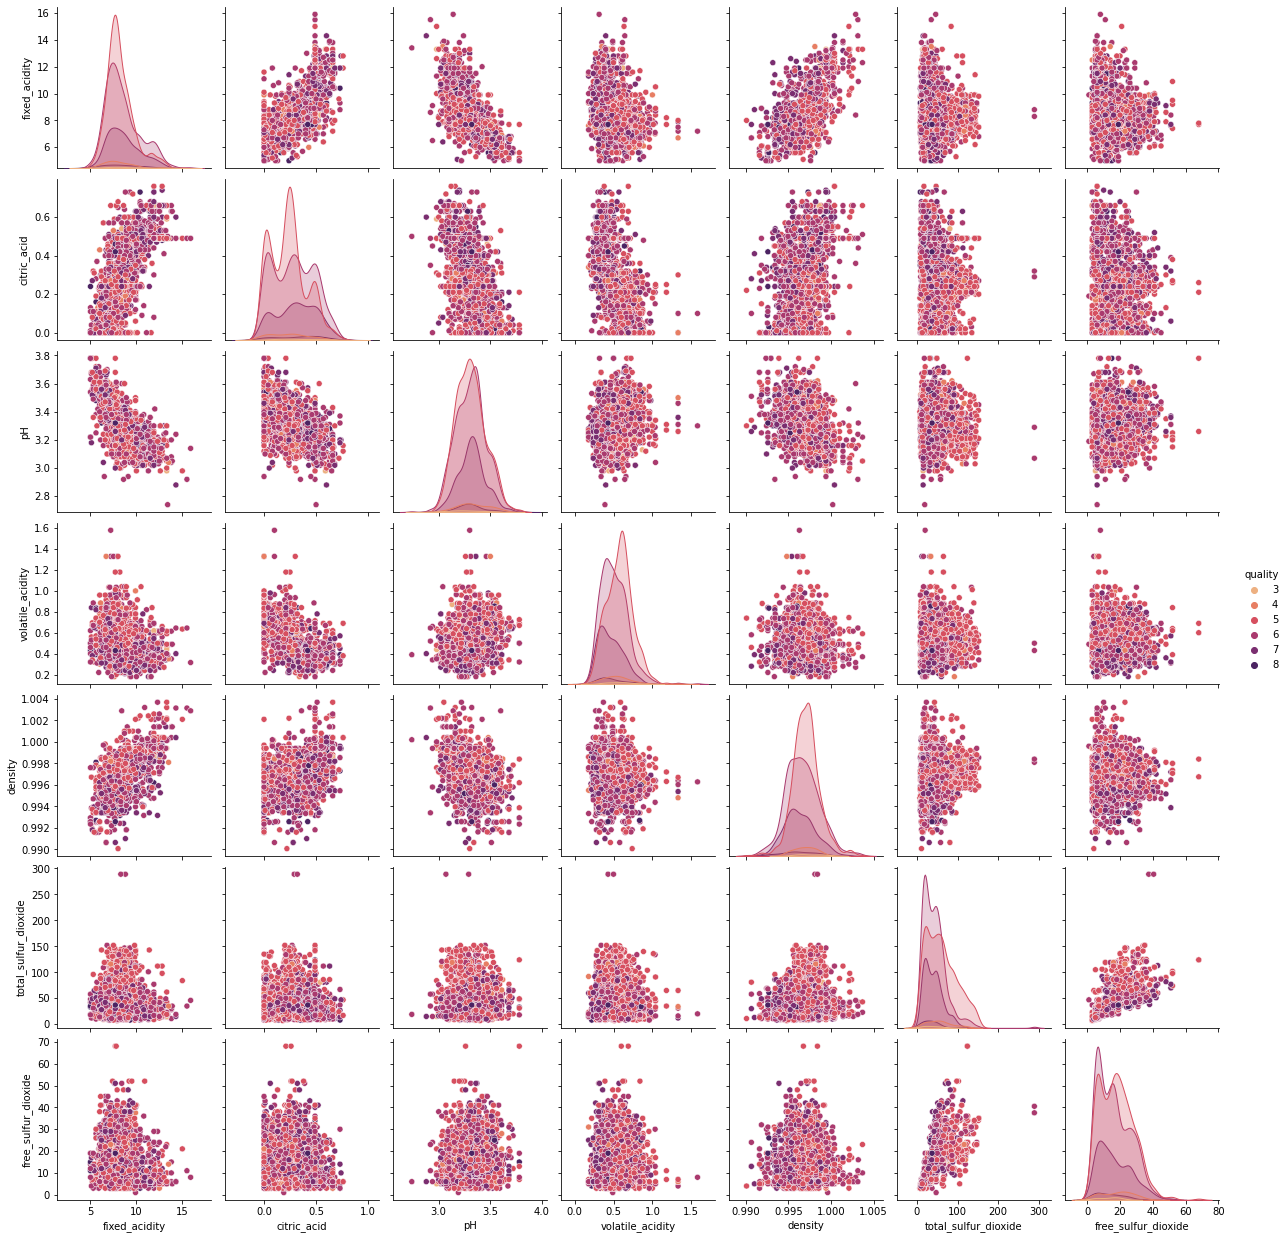

In [10]:
sns.pairplot(df, vars=['fixed_acidity', 'citric_acid', 'pH', 'volatile_acidity',
                 'density', 'total_sulfur_dioxide', 'free_sulfur_dioxide'], hue="quality", palette="flare")

---
<a id = "T5"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
<p style="background-color:#FF9999;color:black;font-size:30px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.0cm">🗨️ 4) Analysis 💬</p>

<a id = "T51"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">4.1) T-test (One Sample & Two Sample, Welch's Test)</span>
### <span style="color:#99004C;">&emsp; 4.1.1) One Sample T-test<span>

|Hypothesis|Description|
|:-:|:--|
|Null Hypothesis (H0)| The mean of the alcohol is 11.5<br>|
|Alternative Hypothesis (Ha)| The mean of the alcohol is not 11.5|

In [11]:
stats.ttest_1samp(df[df['quality'] == 8]['alcohol'], popmean = 11.5)

Ttest_1sampResult(statistic=0.015539573865253708, pvalue=0.9876830165693239)

In [12]:
stats.ttest_1samp(df[df['quality'] == 3]['alcohol'], popmean = 11.5)

Ttest_1sampResult(statistic=-10.920006695392516, pvalue=3.047584281416678e-07)

|Hypothesis|Description|
|:-:|:--|
|Null Hypothesis (H0)| The mean of the alcohol is 9.8<br>|
|Alternative Hypothesish(Ha)| The mean of the alcohol is not 9.8|

In [13]:
stats.ttest_1samp(df[df['quality'] == 8]['alcohol'], popmean = 9.8)

Ttest_1sampResult(statistic=10.318277046528495, pvalue=1.4189415907447168e-12)

In [14]:
stats.ttest_1samp(df[df['quality'] == 3]['alcohol'], popmean = 9.8)

Ttest_1sampResult(statistic=0.10811887817220861, pvalue=0.9158483266903515)

#### 👆Interpretation of the p-value :
Take popmean = 11.5:
    
|Quality|p-value|Null Hypothesis|
|:-:|:-:|:-:|
|3 (Lowest Quality)|<= 0.05|Rejected|
|8 (Highest Quality)|> 0.05|Fail to Reject|

Take popmean = 9.8:

|Quality|p-value|Null Hyoothesis|
|:-:|:-:|:-:|
|3 (Lowest Quality)|> 0.05|Fail to Reject|
|8 (Highest Quality)|<= 0.05|Rejected|

### <span style="color:#99004C;">&emsp; 4.1.2) Two samples T-test</span>

Reference: [Welch’s t-Test in Python](https://www.geeksforgeeks.org/welchs-t-test-in-python/)

In [29]:
# Calculating the variances:
a = np.var(df[df['quality'] == 3]['alcohol'])
b = np.var(df[df['quality'] == 4]['alcohol'])
c = np.var(df[df['quality'] == 5]['alcohol'])
d = np.var(df[df['quality'] == 6]['alcohol'])
e = np.var(df[df['quality'] == 7]['alcohol'])
f = np.var(df[df['quality'] == 8]['alcohol'])
print("Variance of the alcohol of Wine Quality 3:", a)
print("Variance of the alcohol of Wine Quality 4:", b)
print("Variance of the alcohol of Wine Quality 5:", c)
print("Variance of the alcohol of Wine Quality 6:", d)
print("Variance of the alcohol of Wine Quality 7:", e)
print("Variance of the alcohol of Wine Quality 8:", f)

stats.ttest_ind(a, b, equal_var = True)

Variance of the alcohol of Wine Quality 3: 0.26138888888888895
Variance of the alcohol of Wine Quality 4: 0.5372561983471074
Variance of the alcohol of Wine Quality 5: 0.5187611891107117
Variance of the alcohol of Wine Quality 6: 0.9895292054399888
Variance of the alcohol of Wine Quality 7: 1.080700600518618
Variance of the alcohol of Wine Quality 8: 1.0346088099934252


Ttest_indResult(statistic=nan, pvalue=nan)

#### 👆 Wine Quality (3) and (4)(5) and (6)(7)(8) different, therefore Welch’s Test will be used. 👆

### &emsp;&emsp;<span style="color:#99004C;">Welch Test</span>
&emsp;&emsp;&emsp;&emsp;|-> Comparing two means of independent data groups that have different variances.

|Hypothesis|Description|
|:-:|:--|
|Null Hypothesis (H0)| Independent sample means (m1 and m2) are equal. (m1=m2)<br>|
|Alternative Hypothesish(Ha)| Independent sample means (m1 and m2) are not equal. (m1!=m2)|

In [16]:
stat, p = stats.ttest_ind(df[df['quality'] == 3]['alcohol'],
                          df[df['quality'] == 5]['alcohol'], 
                          equal_var = False)
print("test statistic t = {:.4f}; p-value = {:.6f}".format(stat, p))

test statistic t = -0.5432; p-value = 0.597273


In [17]:
stat, p = stats.ttest_ind(df[df['quality'] == 3]['alcohol'],
                          df[df['quality'] == 8]['alcohol'], 
                          equal_var = False)
print("test statistic t = {:.4f}; p-value = {:.6f}".format(stat, p))

test statistic t = -7.4661; p-value = 0.000000


In [18]:
stat, p = stats.ttest_ind(df[df['quality'] == 5]['alcohol'],
                          df[df['quality'] == 8]['alcohol'], 
                          equal_var = False)
print("test statistic t = {:.4f}; p-value = {:.6f}".format(stat, p))

test statistic t = -9.5947; p-value = 0.000000


#### 👆Interpretation of the p-value👆 :
|Quality|p-value|Null Hypothesis|
|:-:|:-:|:-:|
|3 (Lowest Quality) v 5 (Medium Quality)|> 0.05|Fail to Reject<br>|
|3 (Lowest Quality) v 8 (Highest Quality)|<= 0.05|Rejected<br>|
|5 (Medium Quality) v 8 (Highest Quality)|<= 0.05|Rejected<br>|

<a id = "T52"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">4.2) ANOVA Test (PostHoc Analysis)</span>
### &emsp; <span style="color:#99004C;">4.2.1) Pairwise T-test (Two samples)</span>

This method that utilises homogenous variance to compare the means of different groups and provide us with the information how significantly each group differs to one another.

|Hypothesis|Description|
|:-:|:--|
|Null Hypothesis (H0)| The mean of the quality of the wine with a certain alcohol content is equal as another alcohol content's quality mean<br>|
|Alternative Hypothesis(Ha)| The mean of the quality of the wine with a certain alcohol content is the not equal as another alcohol content's quality mean|

In [19]:
# Since Scipy does not include PostHoc tests
# We use the MultiComparison function from statsmodels.stats.multicomp package

stat = MultiComparison(df['quality'], df['alcohol']).allpairtest(stats.ttest_ind, method='Holm')
print(stat[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=Holm
alphacSidak=0.00, alphacBonf=0.000
   group1      group2     stat    pval  pval_corr reject
--------------------------------------------------------
        8.7         9.0      nan    nan       nan  False
        8.7         9.1      nan    nan       nan  False
        8.7         9.2      nan    nan       nan  False
        8.7         9.3      nan    nan       nan  False
        8.7         9.4      nan    nan       nan  False
        8.7         9.5      nan    nan       nan  False
        8.7         9.6      nan    nan       nan  False
        8.7         9.7      nan    nan       nan  False
        8.7         9.8      nan    nan       nan  False
        8.7         9.9      nan    nan       nan  False
        8.7        9.95      nan    nan       nan  False
        8.7        10.0      nan    nan       nan  False
        8.7 10.03333333      nan    nan       nan  False
        8.7        10.1      nan    nan       nan  F

#### 👆Interpretation of the Test Multiple Comparison table👆 :
The table above shows the p value, and the corrected p value when comparing each pairs. If the p value of the difference of mean is less than 0.05, the pair is said to be statistically significant. However the table contains null values, this is due to either precision accuracy issues or the dataset contains values that are identical (according to statsmodel module).

### &emsp; <span style="color:#99004C;">4.2.2) TukeyHSD Test</span>

This method utilises the non-homogenous variances instead.

In [20]:
stat = MultiComparison(df['quality'], df['alcohol']).tukeyhsd().summary()
print(stat)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
        8.7         9.0   1.1786    1.0  -1.828 4.1852  False
        8.7         9.1      1.0    1.0 -2.0273 4.0273  False
        8.7         9.2   1.1977    1.0 -1.7738 4.1691  False
        8.7         9.3    1.209    1.0 -1.7673 4.1852  False
        8.7         9.4   1.1962    1.0 -1.7674 4.1598  False
        8.7         9.5   1.2786    1.0  -1.683 4.2403  False
        8.7         9.6    1.141    1.0 -1.8322 4.1142  False
        8.7         9.7   1.4556 0.9996 -1.5151 4.4262  False
        8.7         9.8   1.4071 0.9998 -1.5603 4.3744  False
        8.7         9.9   1.4884 0.9994 -1.5001 4.4768  False
        8.7        9.95      2.0 0.9998  -2.178  6.178  False
        8.7        10.0     1.93 0.9151  -1.039  4.899  False
        8.7 10.03333333      2.2 0.8547 -1.0363 5.4363  False
        

#### 👆Interpretation of the TukeyHSD Multiple Comparison table👆 :
The table above shows the p-adj when comparing each pairs. If the p-adj of the difference of mean is less than 0.05, the pair is said to be statistically significant. However the table contains null values, this is due to either precision accuracy issues or the dataset contains values that are identical (according to statsmodel module).

<a id = "T53"></a><div style="text-align: right"><a href=#Table_of_content>Back?</a></div>
### <span style="color:#99004C;">4.3) Build Linear Regression model using shap and sklearn library</span>
* Reference: 
    * [Build Linear Regression Model](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Explaining%20a%20model%20that%20uses%20standardized%20features.html#Build-a-linear-model-that-uses-standardized-features) 
    * [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
    * [shap.plots.waterfall()](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html)
    * [shap.summary_plot()](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html)

In [21]:
%%capture
# Installation 
!pip install shap
!pip install -U scikit-learn

In [22]:
import sklearn
import shap

# X-axis refers to all row & columns, except last columns; 'quality' refers to Y-axis
X, Y = df.iloc[:,:-1], df["quality"]           
model = sklearn.linear_model.LinearRegression()                      # Build a linear regression model
model.fit(X, Y)                                                      # Train a linear regression model
predicted_Y = model.predict(X)                                       # Get the output from the linear regression model
df_Y = pd.DataFrame({"Predicted Y": predicted_Y,"Rouded predicted Y":np.round(predicted_Y), "Actual Y": Y})
df_Y

,Predicted Y,Rouded predicted Y,Actual Y
0,6.561914,7.0,6
1,6.580678,7.0,6
2,6.087249,6.0,7
3,5.207714,5.0,5
4,6.553022,7.0,6
...,...,...,...
2051,6.684808,7.0,7
2052,5.340231,5.0,5
2053,6.698542,7.0,8
2054,5.127105,5.0,5


<a id = "T54"></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### <span style="color:#99004C;">4.4) Important feature that contribute to the Quality of wine</span>

In [23]:
# explain the model's predictions using SHAP              
explainer   = shap.explainers.Linear(model, X)
shap_values = explainer(X)

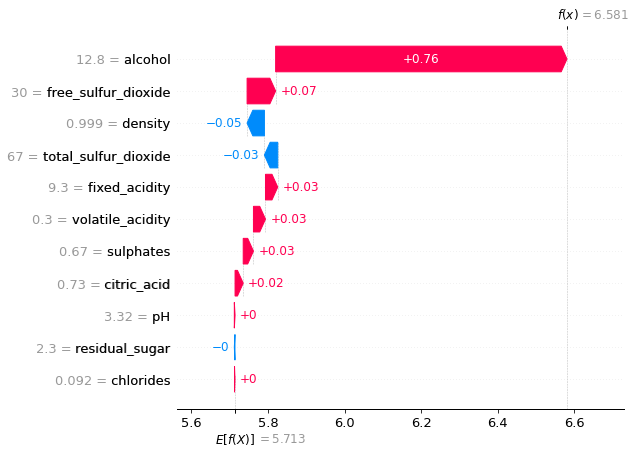

In [24]:
# Use waterfall method to show how positive OR negative contribution of each respective feature to quality of the wine 
idx = 1  # Select one set of data to show
shap.plots.waterfall(shap_values[idx], max_display=11) 

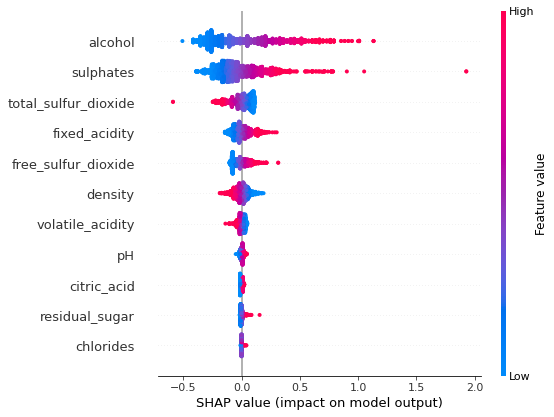

In [25]:
shap.summary_plot(shap_values, X, max_display=11)

<a id = "T55"></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### <span style="color:#99004C;">4.5) Summary of Linear Regression with Mulitiple Predictor</span>

In [26]:
mod = smf.ols('quality ~ alcohol + sulphates + total_sulfur_dioxide + fixed_acidity + free_sulfur_dioxide + density', data = df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.19e-159
Time:                        16:23:42   Log-Likelihood:                -2212.3
No. Observations:                2056   AIC:                             4439.
Df Residuals:                    2049   BIC:                             4478.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.4706 

#### 👆👆👆👆👆
1. If alcohol, sulphates, total sulfur dioxide, fixed acidity, free sulfur dioxide and density is *still*, the quality of wine should be at the **level of 26**.<br>
&emsp;&emsp;|--> However, in our case the range of the quality of wine in the trained datasets are 3 to 8.<br>
&emsp;&emsp;|--> Therefore, this case are ***impossible to happen***.<br>
2. If the ________________________ were increased by 1 unit, the quality of wine will ________________________.<br>
&emsp;&emsp;|--> **alcohol**,  _⬆️ increase by 0.3167 units_<br>
&emsp;&emsp;|--> **sulphates**, _⬆️ increase by 1.5409 units_<br>
&emsp;&emsp;|--> **total sulfur dioxide**,  _⬇️ decrease by 0.0025 units_<br>
&emsp;&emsp;|--> **fixed acidity**, _⬆️ increase by 0.0434 units_<br>
&emsp;&emsp;|--> **free sulfur dioxide**, _⬆️ increase by 0.0063 units_<br>
&emsp;&emsp;|--> **density**, _⬇️ decrease by 25.4675 units_<br>
3. All of the p-values are <0.05, therefore and are significant.<br>
4. The columns of [0.025  0.975] are the Confident Interval Columns, which ***95% confident*** that, <br>
&emsp;&emsp;|--> **intercept coefficient**  between 2.681 ↔️ 50.260<br>
&emsp;&emsp;|--> **alcohol**  between 0.282 ↔️ 0.352<br>
&emsp;&emsp;|--> **sulphates**  between 1.307 ↔️ 1.775<br>
&emsp;&emsp;|--> **total sulfur dioxide**  between -0.004 ↔️ -0.001<br>
&emsp;&emsp;|--> **fixed acidity**  between 0.019 ↔️ 0.068<br>
&emsp;&emsp;|--> **free sulfur dioxide**  between 0.002 ↔️ 0.010<br>
&emsp;&emsp;|--> **density**  between -49.333 ↔️ -1.602<br>
5. ***R-squared*** 0.308 indicates that **30.8% of the variability of quality** can be explained by alcohol, sulphates, total sulfur dioxide, fixed acidity, free sulfur dioxide and density.<br>
6. The ***p-value of F statistics*** is not small which is 151.8, which indicates that the model is **not statistically significant**.<br>

In [27]:
print(summary_col([res], stars = True))


                      quality  
-------------------------------
Intercept            26.4706** 
                     (12.1307) 
alcohol              0.3167*** 
                     (0.0179)  
sulphates            1.5409*** 
                     (0.1192)  
total_sulfur_dioxide -0.0025***
                     (0.0007)  
fixed_acidity        0.0434*** 
                     (0.0125)  
free_sulfur_dioxide  0.0063*** 
                     (0.0021)  
density              -25.4675**
                     (12.1691) 
R-squared            0.3077    
R-squared Adj.       0.3057    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### 👆The reason of chosing the above 6 attrtibutes for the interpretation of Linear Regression with multiple predictor instead of all the predictor is because these p-values are the most significant to be included.

---
<a id = "T6"></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
<p style="background-color:#FF9999;color:black;font-size:30px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.0cm">🍇 5) Conclusion / Findings 🍇</p>

1. To visualize the ___statistical information___ such as the number of data, mean, median, stadard deviation,
minimum value, maximum value, and 1st and 3rd Interquatile Range, a <span style="color:#FF7F7F;">__Box Plot__</span> are shown [here](#T41).<br>


2. [T-test](#T51) and [ANOVA](#T52) Analysis<br>

&emsp;&emsp;|--> __One Sample T-Testing__<br>
&emsp;&emsp;&emsp;A statistical hypothesis test to find out whether the <span style="color:#FF7F7F;">__mean of an unknown population__</span> differs from a specific value.<br>

&emsp;&emsp;|--> __Two Sample T-Testing__<br>
&emsp;&emsp;&emsp;Testing method to see if the <span style="color:#FF7F7F;">__means of 2 groups of an unknown population__</span> are equal or not.<br>

&emsp;&emsp;|--> __ANOVA: Pairwise T-Test__<br>
&emsp;&emsp;&emsp;This technique compares the means of various groups and tells us how strongly each group varies from the others <span style="color:#FF7F7F;">__using homogeneous variance.__</span><br>

&emsp;&emsp;|--> __ANOVA: Tukey HSD__<br>
&emsp;&emsp;&emsp;A single-step technique for numerous comparisons and statistical test. <span style="color:#FF7F7F;">__Using non-homogenous variances__</span>, it may be used to identify means that are<br>&emsp;&emsp;&emsp;considerably different from one another.<br>


3. To ___well represent the data___ the combination of <span style="color:#FF7F7F;">__Histogram Plot__</span> and <span style="color:#FF7F7F;">__Kernel Density Estimation__</span> was used to represent the data in [numerically and continuously](#T42).<br>


4. <span style="color:#FF7F7F;">__Correlation Heatmap__</span> and <span style="color:#FF7F7F;">__Pairplot__</span> was use to ___visualize the positive and negative relationship___ between all others factors. In this analysis, correlation value which greater than 0.5 and smaller than -0.5 are indicates as positive and negative correlation respectively, click to check the [table of Correlation interpretation](#T444).<br>


5. The most and least important features that contribute to the quality of wine is as shown below，<br>
By using the [model's predictions of SHAP](#T54):<br>
&emsp;&emsp; 1. the ___Alcohol___ contribute the <span style="color:#FF7F7F;">
__🔝 highest impact__</span> on the wine quality.<br>
&emsp;&emsp; 2. the ___Sulphates___ contribute the <span style="color:#FF7F7F;">
__2nd highest impact__</span>.<br>
&emsp;&emsp; 3. the ___Total Sulfur Dioxides___, __Fixed Acidity__, __Free Sulfur Dioxide__, __Desity__, __Volatile Acidity__ contribute the <span style="color:#FF7F7F;">
__neutral impact__</span>.<br>
&emsp;&emsp; 4. the ___pH___, ___Citric Acid___, ___Residual Sugar___ and ___Chlorides___ are lower, that mean there is a <span style="color:#FF7F7F;">
__least impact__</span> on quality.<br>

In conclusion, a wine with a higher alcohol content will have a fuller, richer body, while a lower-level alcohol wine will taste lighter and more delicate on the palate(Masterclass Staff, 2020). But the dataset shows that people appreciate a relatively high alcohol level in the wine range.

For the best quality, all the above aspects need to have similar intensity. 